**Classificação página 83**

In [1]:
import time

from sklearn.datasets import fetch_openml

In [2]:
ti = time.time()

mnist_bunch = fetch_openml('mnist_784', version=1)

tf = time.time()
print('tempo download:', tf-ti, 'segundos')

tempo download: 29.081523180007935 segundos


In [3]:
type(mnist_bunch)

sklearn.utils._bunch.Bunch

In [4]:
#mnist_bunch.shape  # não há atributo shape

AttributeError: shape

In [5]:
mnist_bunch

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

**módulo pickel**<br>
* é um módulo do Python padrão, não precisa instalar.
* converte objetos em uma sequência de bytes para que possam ser armazenados ou transmitidos.<br>
* with open('mnist.pkl', 'wb') as bunch abre o arquivo mnist.pkl no modo de escrita binária ('wb'). O bloco with fecha o arquivo após a gravação, mesmo que ocorra um erro durante o processo.
* pickle.dump(mnist, bunch, protocol=pickle.HIGHEST_PROTOCOL) salva o mnist no arquivo usando o protocolo mais eficiente e recente, o pickle.HIGHEST_PROTOCOL, (mais rápido, arquivo menor).<br>

Serialização em outras linguagens:<br>
Binário: Java Serializable, C# BinaryFormatter, Protobuf (do Google)<br>
Texto estruturado: JSON, XML<br>
BSON: MongoDB (para arquivos grandes, tipos de dados que não tem no json,  eficiência, flexibiliade<br>

In [ ]:
import pickle

In [6]:
with open('mnist.pkl', 'wb') as bunch:
    pickle.dump(mnist_bunch, bunch, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
print(bunch, '\n\nmnist.pkl está aberto e pronto para receber dados em formato binário')

<_io.BufferedWriter name='mnist.pkl'> 

mnist.pkl está aberto e pronto para receber dados em formato binário


In [8]:
print(type(bunch), '\n\nbunch aponta para um objeto da classe _io.BufferedReader\nA referência bunch lê arquivos em modo binário')

<class '_io.BufferedWriter'> 

bunch aponta para um objeto da classe _io.BufferedReader
A referência bunch lê arquivos em modo binário


In [9]:
with open('mnist.pkl', 'rb') as bunch: 
    mnist_str = pickle.load(bunch)
# bunch aponta para um objeto da classe _io.BufferedWriter.
# A referência bunch escreve arquivos em modo binário

In [10]:
type(mnist_str)

sklearn.utils._bunch.Bunch

In [11]:
mnist_str.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [13]:
mnist_str['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [14]:
print(mnist_str['feature_names'])

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

Há 70 mil imagens e cada imagem possui 784 características.<br>
Isso ocorre porque cada imagem tem 28 × 28 pixels,<br>
e cada característica representa a intensidade de um pixel, de 0 (branco) a 255 (preto).<br>
Vamos dar uma olhada em um dígito do conjunto de dados.<br>
Utilizando a função imshow() do Matplotlib, você só precisa pegar um vetor de característica de uma instância, remodelá-lo para um array de 28 × 28 e exibi-lo

In [16]:
X, y = mnist_str['data'], mnist_str['target']

In [20]:
print(type(X)), print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


(None, None)

**conveter de str para int**<br>

In [21]:
y = y.astype(int)

In [25]:
print(type(y))

<class 'pandas.core.series.Series'>


In [23]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [30]:
X.iloc[9].values.reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [32]:
print(X.iloc[9].index)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)


In [34]:
import numpy as np

In [36]:
np.set_printoptions(linewidth=200)
X.iloc[7].values.reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 226, 252, 253, 252, 252, 252, 252, 252

In [37]:
y.iloc[7]

np.int64(3)

In [40]:
import matplotlib.pyplot as plt

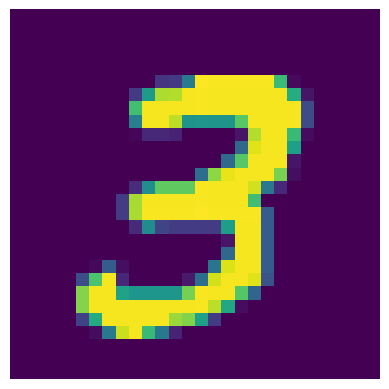

In [44]:
dig = X.iloc[7]
img = dig.values.reshape(28, 28)
plt.imshow(img)
plt.axis('off');

In [ ]:
plt.figure(figsize=(5, 3))
for i in range(50):    
    plt.subplot(5,10, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap='binary')               
    plt.axis('off')

plt.figure(figsize=(5, 3))  # Configura o tamanho da figura
for i in range(50):
    plt.subplot(5, 10, i + 1)  # Cria subplots 5x10
    img = X.iloc[i].to_numpy().reshape(28, 28)  # Acessa os dados e redimensiona
    plt.imshow(img, cmap='binary')  # Exibe a imagem em escala de cinza
    plt.axis('off')  # Remove os eixos

**1 - Separar dados de teste**<br>
O dataset MNIST disponível no OpenML segue a divisão tradicional de 60.000 imagens para treinamento e 10.000 para teste. Isto é consistente com a versão original do dataset, que foi projetado para facilitar a criação e avaliação de modelos de aprendizado de máquina, especialmente em tarefas de classificação de dígitos manuscritos.<br>

**embaralhar os dados para**<br>
* Evitar dependências estruturais ou padrões não intencionais (por exemplo, todos os dígitos 0 seguidos de todos os dígitos 1, etc.)
* Reduzir o risco de overfitting (o modelo pode começar a "memorizar" a sequência de dados em vez de aprender a generalizar)
* Preparar para cross-validation, na qual é essencial que os dados sejam embaralhados para garantir que as divisões dos dados sejam aleatórias.
* Em modelo como Stochastic Gradient Descent (SGD), embaralhar os dados em cada época pode ajudar a reduzir a correlação entre as amostras consecutivas

**<center>Treinando classificador binário**
Classificador binário capaz de distinguir apenas entre duas classes: 1 e 9

In [ ]:
#                       1                                        9
# 1         
# 9         

In [ ]:
#                    Previsto Negativo      Previsto Positivo

# Real Negativo      Verdadeiro Negativo     Falso Positivo
# Real Positivo      Falso Negativo          Verdadeiro Positivo

Matriz de confusão é uma tabela usada em problemas de classificação <br>
para avaliar o desempenho de um modelo, comparando as previsões do modelo <br>
com os valores reais dos dados. Ela mostra quantas das classificações corretas<br>
e incorretas foram feitas pelo modelo.<br>
Em uma matriz de confusão, os elementos diagonais representam as<br>
previsões corretas, enquanto os elementos fora da diagonal representam as<br>
previsões incorretas.